# Clustering - customer profiles

--> https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook

## Datensatz

Datensatz kommt (mal wieder) von Kaggle:
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


### About Dataset
Context

#### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
Content

#### Attributes

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Target

Need to perform clustering to summarize customer segments.

#### Acknowledgement

The dataset for this project is provided by Dr. Omar Romero-Hernandez. 

## Bibliotheken importieren

In [145]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # data visualization library  
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

In [146]:
filename = "data/marketing_campaign.csv"

data = pd.read_csv(filename, delimiter = "\t")
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# (1) Erste Datenerkundung
- Wie viele und welche Spalten gibt es? --> `data.columns`
- Gibt es fehlende Werte? --> `.info()`
- erster Überblich und: Gibt es merkwürdige Einträge --> `.describe()`

### Ausfüllen:
- Anzahl der Spalten: 29
- Gibt es fehlende Werte und wenn ja, welche? Income

In [147]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### ID als Index nehmen:

In [148]:
data = data.set_index("ID")


In [149]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Data pre-processsing: Datum umwandeln
Das geht in Pandas mit `pd.to_datetime()`. Dabei kann entweder das vorliegende Format beschrieben werden --> `format = '%d-%m-%Y'`

Oder wir probieren einfach aus was Pandas "errät" --> `infer_datetime_format=True`

Anschließend ist das Datum kein String mehr (auch wenn es beim Anzeigen so aussieht!), sondern ein eigenes `Timestamp`-Format.

### Einmal testen:

- Was gibt `data["Dt_Customer"][0].day`?
- Was gibt `data["Dt_Customer"][0].year`?


In [150]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],
                                     dayfirst=True, format = '%d-%m-%Y')
                                     #infer_datetime_format=True)

In [151]:
mask = data["Dt_Customer"] > "2014-01-01"
data[mask]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0
4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,6,58,8,0,27,3,7,6,6,4,1,0,0,0,0,0,3,11,0
10084,1972,Graduation,Married,24434.0,2,0,2014-05-18,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0


# (1b) Weitere Datenerkundung
- Bei welchen Features / Merkmalen gibt es "Ausreißer" ?

Dafür lohnt es ich die Feature als Verteilung darzustellen mit `plot(kind="hist")` oder direkt mit `.hist()`.

Das geht übrigens sogar für alle numerischen Feature auf einmal mit `data.hist()`. Hier sollte aber über `figsize=(...)` die Größe angepasst werden.

array([[<AxesSubplot: title={'center': 'Year_Birth'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Kidhome'}>,
        <AxesSubplot: title={'center': 'Teenhome'}>],
       [<AxesSubplot: title={'center': 'Dt_Customer'}>,
        <AxesSubplot: title={'center': 'Recency'}>,
        <AxesSubplot: title={'center': 'MntWines'}>,
        <AxesSubplot: title={'center': 'MntFruits'}>],
       [<AxesSubplot: title={'center': 'MntMeatProducts'}>,
        <AxesSubplot: title={'center': 'MntFishProducts'}>,
        <AxesSubplot: title={'center': 'MntSweetProducts'}>,
        <AxesSubplot: title={'center': 'MntGoldProds'}>],
       [<AxesSubplot: title={'center': 'NumDealsPurchases'}>,
        <AxesSubplot: title={'center': 'NumWebPurchases'}>,
        <AxesSubplot: title={'center': 'NumCatalogPurchases'}>,
        <AxesSubplot: title={'center': 'NumStorePurchases'}>]],
      dtype=object)

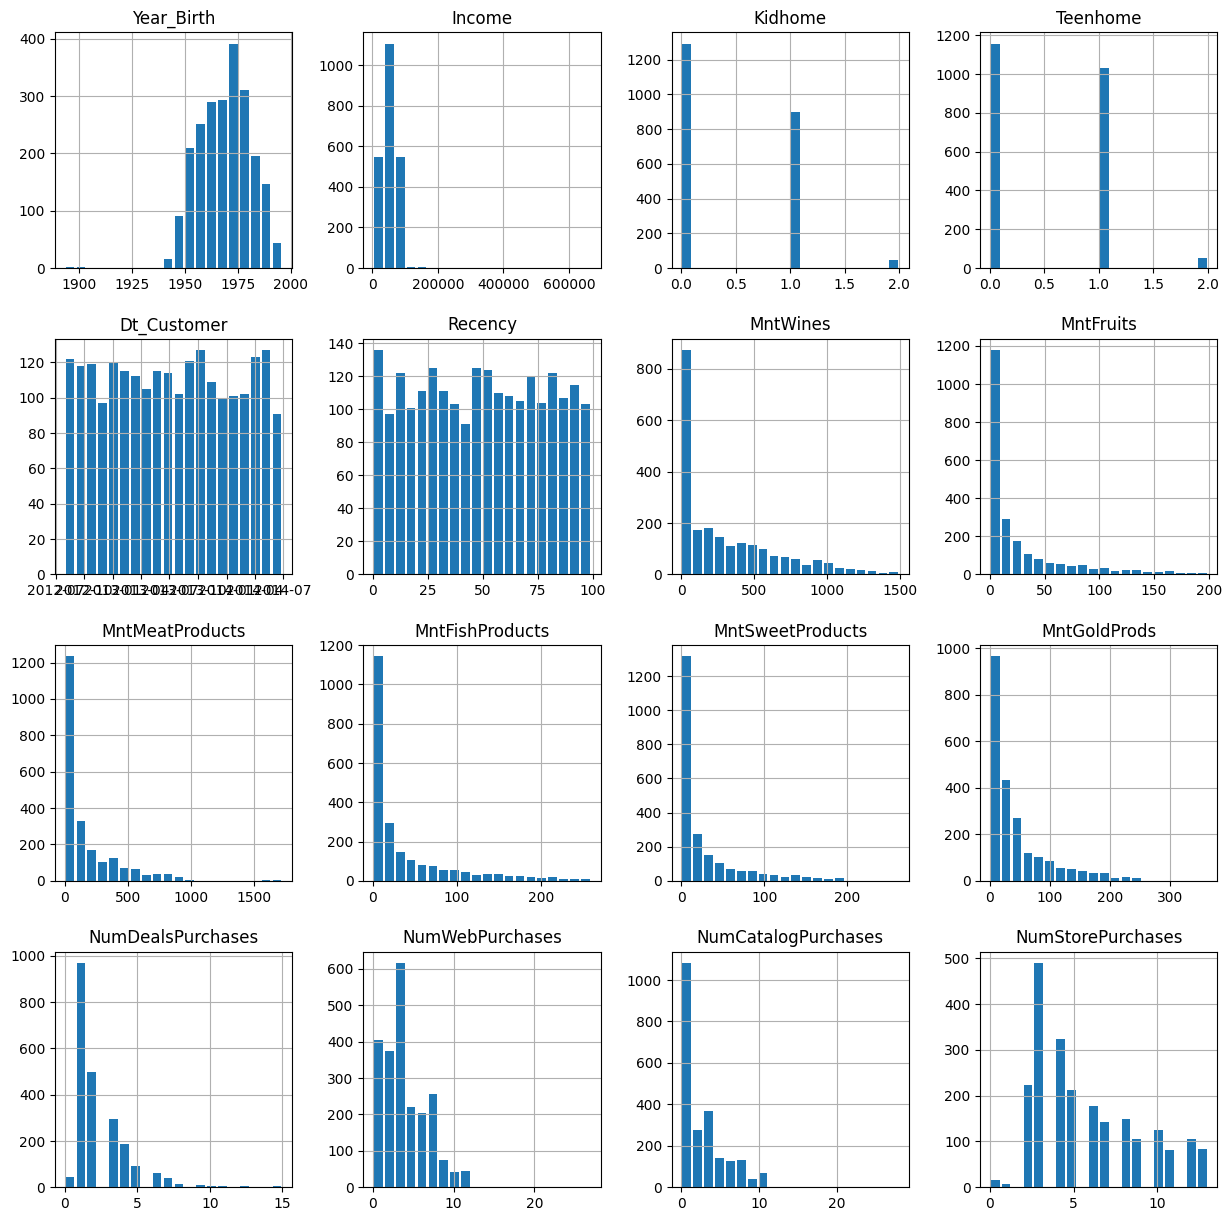

In [152]:
data.iloc[:, :18].hist(figsize=(15,15),bins=20, rwidth=0.8)

## (2) Data cleaning
- Einträge mit NaNs entfernen, z.B: mit `dropna()`

In [153]:
data = data.dropna()

## Data cleaning 2 --> Ausreißer entfernen
In den Verteilungen/histograms sieht man einige Ausreißer. Es gibt einige Einträge bei `Income` die stark abweichen vom Rest. Auch beim Alter scheint nicht alles zu stimmen. 
- Alle Datenpunkte mit `Income` >= 150000 sollen entfernt werden.
- Alle Datenpunkte mit `Year_Birth` < 1925 sollen entfernt werden.

In [154]:
mask = (data["Income"] <= 150000) & (data["Year_Birth"] > 1925 )
data = data[mask]

In [155]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000
mean,1968.904308,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102
std,11.705801,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
25%,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
50%,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
75%,1977.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000


# (3) Daten erkunden
- Erkundet mit `value_counts()` die Feature `"Marital_Status"` und `"Education"`. Das geht auch grafisch mit zusätzlichem `.plot(kind="barh")` oder `.plot(kind="pie")`.

<AxesSubplot: >

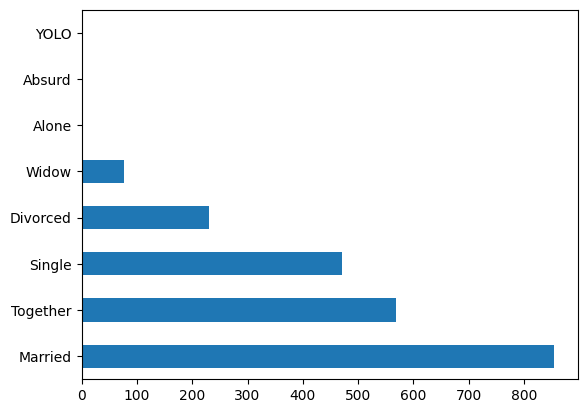

In [156]:
data["Marital_Status"].value_counts().plot(kind='barh')

In [157]:
data["Education"].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

# Preprocessing
Jetzt wollen wir noch einige Feature umwandeln, entfernen, hinzufügen...
- Ersetzt `Year_of_Birth` mit einem neuen Feature `Age` das berechnet wird über `2020 - Year_of_Birth`.
- Fügt ein neues Feature `Spent` hinzu, dass die Summe aller Einkäufe enthält:
`'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases'`

### Feature umbenennen
Einige Feature möchten wir lieber anders nennen. Dafür bitte folgendes ausführen:
```python
data=data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})
```

### Features entfernen
- Die folgenden Feature sollen entfernt werden: "Year_Birth", "Z_CostContact", "Z_Revenue"

Entfernen geht z.B. über `df = df.drop(list_of_cols_to_drop, axis=1)`.

In [158]:
data['Age'] = 2020 - data['Year_Birth'] 
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39


In [159]:
#data["Spent"] = data["MntFishProducts"] + data["MntFruits"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["NumDealsPurchases"] + data["MntWines"]
data["Spent"] = data.iloc[:,8:14].sum(axis=1)


In [160]:
data=data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})

In [161]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,1617
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,27
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,776
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,53
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,422


In [162]:
data= data.drop(columns=["Year_Birth","Z_CostContact", "Z_Revenue"])
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,1617
2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,27
4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,776
6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,53
5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,1341
4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,444
7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,1241


## Korrelationen!
Wir können uns alle Pearson-Korrelationen anschauen mit `data.corr()`.
Bei der Anzahl macht es auch gleich Sinn das grafisch darzustellen mit
```python
sb.heatmap(data.corr())
```

### Aufgabe:
- Korrelationsmatrix grafisch darstellen.

In [173]:
data.corr()

C:\Users\Phili\AppData\Local\Temp\ipykernel_15080\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,-0.132427,0.503184,0.710057,0.687206,-0.648306,-0.011181,0.233267,0.416386,0.345242,0.110210,-0.027488,0.174902,0.212625,0.823770
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,0.226434,-0.375590,-0.519813,-0.506543,0.448497,0.015897,-0.162597,-0.205124,-0.174741,-0.082124,0.037025,-0.078409,-0.238083,-0.558234
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,0.394341,0.161229,-0.114019,0.047321,0.129365,-0.043223,0.037860,-0.190760,-0.145748,-0.015805,0.007633,-0.155196,0.362919,-0.138565
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,0.000479,-0.005104,0.029750,0.000462,-0.017906,-0.032327,0.017658,0.000334,-0.021097,-0.001390,0.005758,-0.200413,0.014228,0.021824
Wines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,0.011858,0.552342,0.673234,0.639373,-0.329395,0.060700,0.373063,0.472729,0.351346,0.206231,-0.036709,0.245559,0.164438,0.897262
Fruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,-0.136350,0.300813,0.513686,0.459056,-0.424463,0.014131,0.006078,0.208615,0.192061,-0.010147,-0.003135,0.122331,0.013149,0.614464
Meat,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,-0.165522,0.329453,0.714382,0.517245,-0.543387,0.021224,0.096798,0.389276,0.325306,0.045842,-0.020921,0.248821,0.041540,0.856838
Fish,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,-0.145030,0.297776,0.563174,0.456896,-0.453353,-0.000832,0.015513,0.194387,0.261389,0.002093,-0.019299,0.107405,0.040855,0.644453
Sweets,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,-0.122279,0.332057,0.524369,0.454133,-0.429375,0.001099,0.028665,0.258053,0.244771,0.009915,-0.020773,0.115326,0.021075,0.609244
Gold,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,0.056926,0.405961,0.471032,0.388575,-0.253022,0.124984,0.023613,0.176118,0.170380,0.050731,-0.030440,0.140210,0.059295,0.529845


<AxesSubplot: xlabel='Income', ylabel='Wines'>

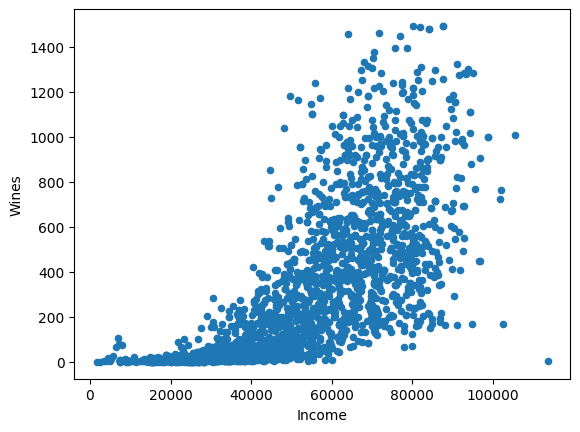

In [175]:
data.plot(kind='scatter', x='Income', y='Wines')

In [ ]:
mask

C:\Users\Phili\AppData\Local\Temp\ipykernel_15080\2752948491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr())


<AxesSubplot: >

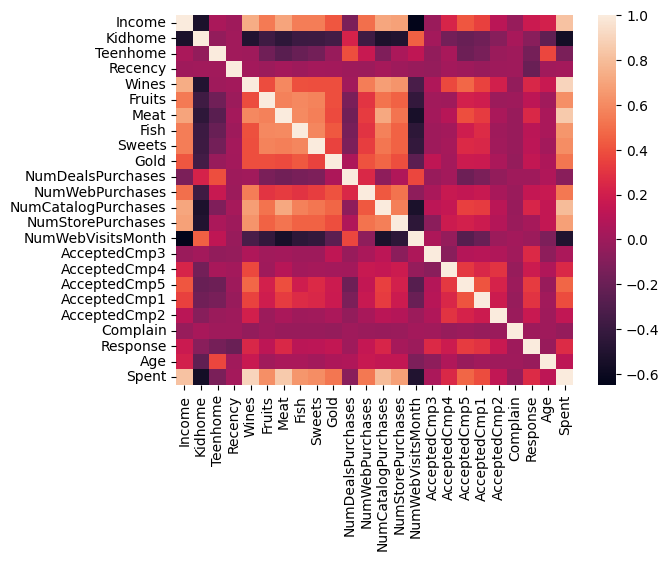

In [170]:
sb.heatmap(data.corr())

## Aufhübschen...
Der Plot wird (wahrscheinlich) etwas besser lesbar, wenn wir die Werte mit anzeigen (`annot=True`). 

Wir können auch eine andere "Colormap" auswählen, siehe [matplotlib-Dokumentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
Dazu passt auch das Setzen von Min- und Max-Werten, hier am besten mit `vmin=-1, vmax=1`.


C:\Users\Phili\AppData\Local\Temp\ipykernel_15080\787791594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),annot=True)


<AxesSubplot: >

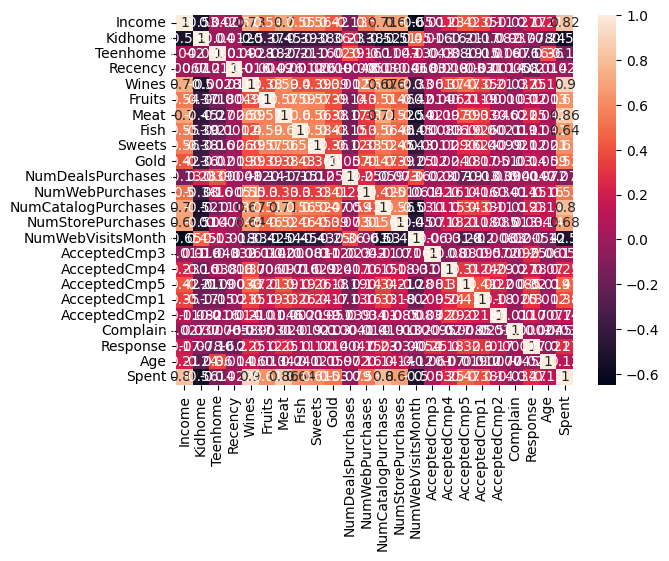

In [171]:
sb.heatmap(data.corr(),annot=True)

## Clustering
Wir werden hier k-means ausprobieren!

Dafür nutzen wir [Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html).

In [163]:
data.select_dtypes(include='number')

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,1617
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,27
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,776
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,53
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,1341
4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,444
7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,1241


# Daten skalieren

Für viele ML/Data Science Techniken ist es essentiel die Daten passend zu skalieren. Im vorliegenden Fall würde bei Techniken die absolute Zahlen berücksichtigen sonst eine starke Verzerrung hin zu "großen" Zahlen auftreten, hier also z.B. `Income` etc.

Wir werden die Werte darum standardisieren mit dem `StandardScaler` der Bibliothek `scikit-learn`.

In [176]:
from sklearn.preprocessing import StandardScaler

# Creating a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')

# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_remove = ['AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Response']
data_numerical = data_numerical.drop(cols_remove, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(data_numerical)
data_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

In [177]:
data_scaled.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,1.679323
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-0.963897
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,0.281242
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-0.920675
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.307248


## K-means
- hier mit 4 Clustern als Vorgabe!

Der Import geht über `from sklearn.cluster import KMeans`.
Anschließend muss der Algorithmus mit `.fit()` auf den Daten laufen:
`kmeans = KMeans(...).fit(data_scaled)`

Als Parameter müssen wir noch zumindest `n_clusters=...` hinzufügen. Besser auch noch `random_state=...`.

In [182]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4 , random_state=0)
kmeans.fit(data_scaled)

kmeans.labels_[:100]


array([0, 1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 3, 2, 2, 0, 3,
       3, 3, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 3, 2, 1, 0, 0, 2, 1, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3, 3, 3, 0, 2, 1, 0, 3, 3, 0,
       3, 3, 1, 2, 0, 0, 2, 3, 2, 2, 2, 1, 0, 1, 1, 3, 0, 1, 2, 2, 2, 3,
       1, 0, 3, 1, 1, 0, 0, 0, 2, 1, 3, 2])

In [184]:
data['cluster'] = kmeans.labels_

## Daten Darstellen

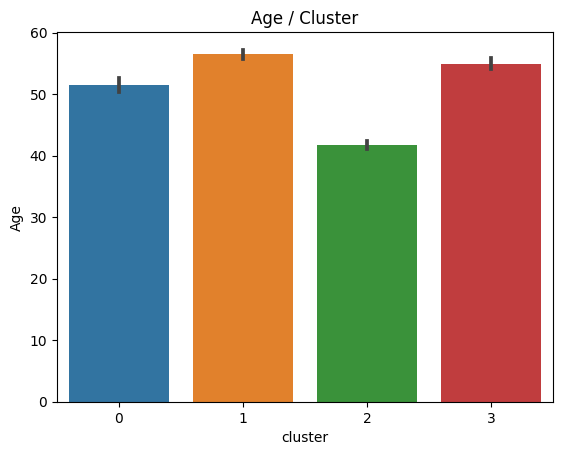

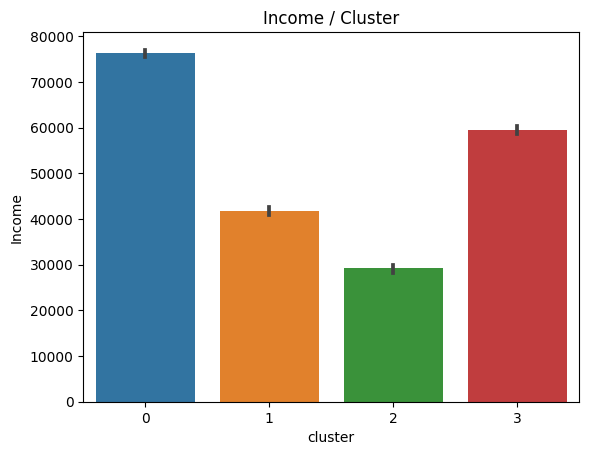

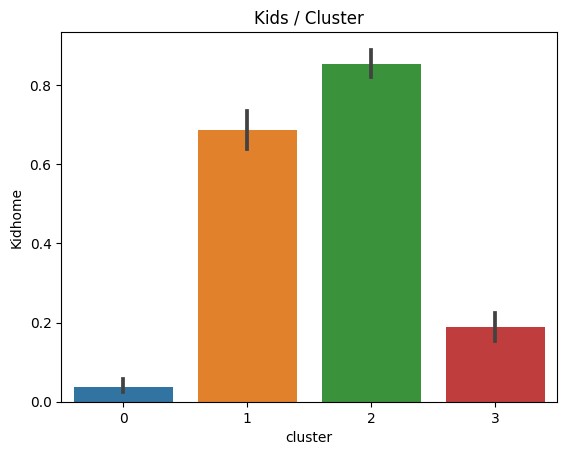

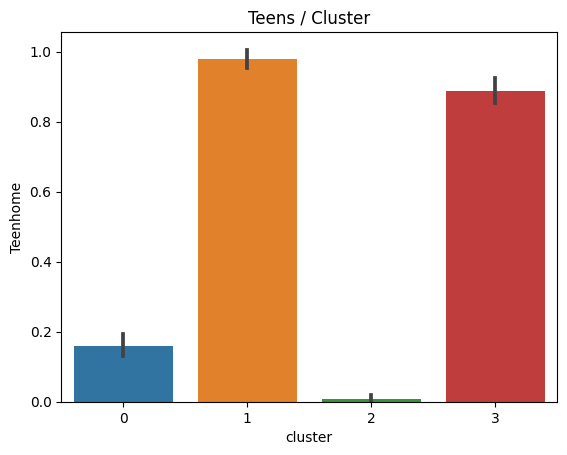

In [185]:
import seaborn as sb

sb.barplot(x='cluster',y='Age', data=data)
plt.title("Age / Cluster")
plt.show()

sb.barplot(x='cluster',y='Income', data=data)
plt.title("Income / Cluster")
plt.show()

sb.barplot(x='cluster',y='Kidhome', data=data)
plt.title("Kids / Cluster")
plt.show()

sb.barplot(x='cluster',y='Teenhome', data=data)
plt.title("Teens / Cluster")
plt.show()

<AxesSubplot: xlabel='cluster', ylabel='Spent'>

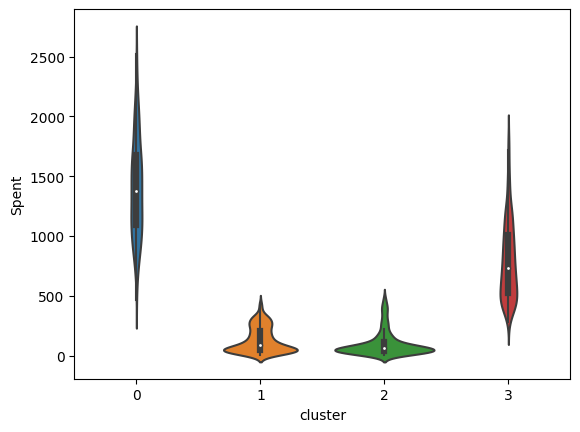

In [187]:
#data.plot(kind="scatter", x="cluster", y='Spent' )
sb.violinplot(data=data, y="Spent", x="cluster")

<AxesSubplot: xlabel='Income', ylabel='Spent'>

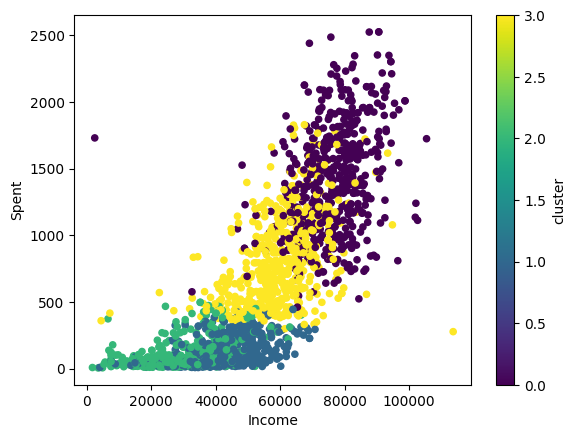

In [190]:
data.plot(kind="scatter", x="Income", y="Spent", c='cluster', cmap='viridis')